In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

##### Reproduce music data from lesson

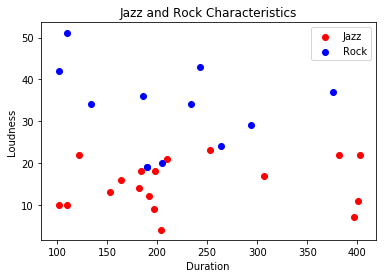

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

##### Define KNN classifier function

In [3]:
def distance(data,x_vars):   
    c_sq = 0    
    for key in x_vars: 
        c_sq += ((data[key] - x_vars[key])**2)       
    return np.sqrt(c_sq)

def KNN(neighbors,data,X_vars,Y):

    # Calculate distance from each point in training set.
    data['distance'] = distance(music,x_vars)
    closest = data.nsmallest(neighbors, 'distance')
    
    # Determine p(true)
    p_true = round(closest[Y].mean(),3)
    p_false = round(1 - p_true,3)
    
    # Output results
    if p_true > p_false:
        output = [1]
        print('Model classifies as (p = {})'.format(Y,p_true))
    elif p_true < p_false:
        output = [0]
        print('Model classifies as NOT {} (p = {})'.format(Y,p_false))
    else:
        print('Could not make a prediction')
        
    output.append([p_false, p_true])
    return output

###### Make a prediction using the prefab SKLearn KNN function

In [4]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[ 0.4  0.6]]


###### Make a prediction using my KNN function

In [5]:
## Predict for a 24 loudness, 190 seconds long song.
x_vars = {'duration':190, 
          'loudness':24}

KNN(5,music,x_vars,'jazz')

Model classifies as (p = jazz)


[1, [0.4, 0.6]]